## Which skills are the most valuable for Data Analysts?

#### Methodology

1. Create visualizations comparing median salaries with skill demand percentages
2. Explore whether specific technologies appear more frequently in certain roles or industries

### Importing Libraries and Cleaning-up Data

In [53]:
#Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Separating skills only among US Data Analysts

In [54]:
df_US = df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')].dropna(subset='salary_year_avg')
df_US_skills = df_US.explode('job_skills')

Then I created a table with further neccessary information about Data Analysts such as: Median salary, Posting count and Skill percentage

In [92]:
skill_table = df_US_skills.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count',ascending=False)
skill_table['percent'] = skill_table['count']/len(df_US)*100
skill_table

,median,count,percent
job_skills,,,
sql,91000.0,2508,57.655172
excel,84392.0,1808,41.563218
python,97500.0,1431,32.896552
tableau,92875.0,1364,31.356322
sas,90000.0,926,21.287356
...,...,...,...
theano,100000.0,1,0.022989
typescript,65000.0,1,0.022989
vmware,147500.0,1,0.022989


Cleaning-up Job Type Skills

In [70]:
df_technologies = df['job_type_skills']
df_technologies = df_technologies.dropna()
df_technologies = df_technologies.drop_duplicates()

technology_dict = {}
for row in df_technologies:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value


for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spreadsheet',
  'nuix',
  'word',
  'outlook',
  'sharepoint',
  'datarobot',
  'alteryx',
  'powerbi',
  'excel',
  'power bi',
  'esquisse',
  'qlik',
  'ms access',
  'powerpoint',
  'looker',
  'sas',
  'ssis',
  'tableau',
  'splunk',
  'microstrategy',
  'dax',
  'sheets',
  'spss',
  'visio',
  'cognos',
  'msaccess',
  'sap',
  'ssrs'],
 'programming': ['vba',
  'rust',
  'no-sql',
  'nosql',
  'objective-c',
  'pascal',
  'vb.net',
  'shell',
  'html',
  'perl',
  'c++',
  'ruby',
  'cobol',
  'fortran',
  'visualbasic',
  'r',
  'powershell',
  'php',
  'typescript',
  'javascript',
  'dart',
  'elixir',
  'matlab',
  'css',
  'julia',
  'go',
  'sas',
  'golang',
  'visual basic',
  'delphi',
  'assembly',
  't-sql',
  'clojure',
  'apl',
  'swift',
  'java',
  'sql',
  'lua',
  'kotlin',
  'python',
  'f#',
  'mongo',
  'bash',
  'crystal',
  'ocaml',
  'sass',
  'c',
  'erlang',
  'solidity',
  'lisp',
  'haskell',
  'groovy',
  'mongodb',
  'c#',
  'sc

Turning Dictionary to a Data frame

In [71]:
df_technologies = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'job_skills']).explode('job_skills')
df_technologies = df_technologies.set_index('job_skills')
df_technologies

,technology
job_skills,
spreadsheet,analyst_tools
nuix,analyst_tools
word,analyst_tools
outlook,analyst_tools
sharepoint,analyst_tools
...,...
slack,sync
ringcentral,sync
wire,sync


Now I can unite two frames to a single table so I could plot it. 

Also it is important to get rid of dublicates and leave only skills above 5%

In [106]:
plot_table = skill_table.merge(df_technologies, on='job_skills', how='left')
plot_table = plot_table[plot_table['percent']>5].reset_index()
plot_table = plot_table.drop_duplicates('job_skills')
plot_table.set_index('job_skills', inplace=True)
plot_table

,median,count,percent,technology
job_skills,,,,
sql,91000.00,2508,57.655172,programming
excel,84392.00,1808,41.563218,analyst_tools
python,97500.00,1431,32.896552,programming
tableau,92875.00,1364,31.356322,analyst_tools
sas,90000.00,926,21.287356,analyst_tools
r,92500.00,893,20.528736,programming
power bi,90000.00,838,19.264368,analyst_tools
powerpoint,85000.00,462,10.620690,analyst_tools
word,81194.75,461,10.597701,analyst_tools


### Ploting Scatter Graph

In [74]:
from adjustText import adjust_text

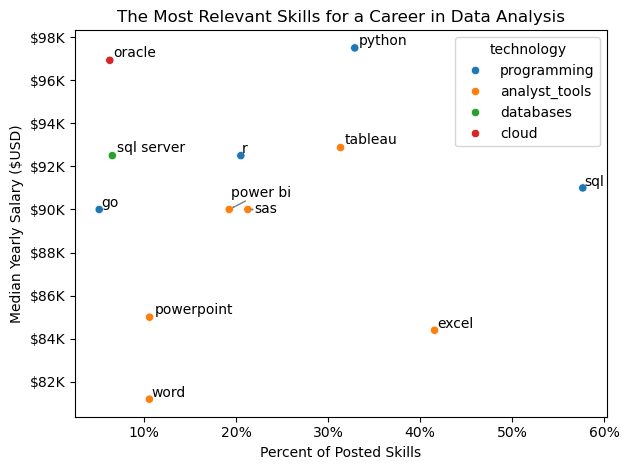

In [ ]:
sns.scatterplot(data=plot_table, x='percent', y='median', hue='technology')

#Labeling each point with their depended skills
labels = []
for i, skill in enumerate(plot_table.index):
    labels.append(plt.text(plot_table['percent'].iloc[i], plot_table['median'].iloc[i], skill))

adjust_text(labels, arrowprops=dict(arrowstyle='->', color='grey'))

#Customizing
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


plt.xlabel('Percent of Posted Skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('The Most Relevant Skills for a Career in Data Analysis')

#Displaying
plt.tight_layout()
plt.show()